In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sujayambekar","key":"89ecf3b3ef1b8667b85e81ec34525c14"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Downloading dataset from kaggle

In [5]:
!kaggle datasets download -d moltean/fruits

 99% 749M/760M [00:13<00:00, 66.9MB/s]
100% 760M/760M [00:13<00:00, 58.5MB/s]


In [6]:
!unzip /content/fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
my_data_dir='/content/fruits-360'

In [9]:
os.listdir(my_data_dir)

['LICENSE', 'Test', 'papers', 'readme.md', 'test-multiple_fruits', 'Training']

In [10]:
test_path = my_data_dir+'/Test/'
train_path = my_data_dir+'/Training/'

In [11]:
os.listdir(test_path)

['Tomato 3',
 'Kumquats',
 'Raspberry',
 'Cherry Wax Black',
 'Apple Red Delicious',
 'Plum 3',
 'Pepper Green',
 'Pear Abate',
 'Pineapple Mini',
 'Cucumber Ripe',
 'Potato Sweet',
 'Plum',
 'Peach',
 'Papaya',
 'Apple Red 1',
 'Pomegranate',
 'Apple Red Yellow 1',
 'Pear Williams',
 'Pear',
 'Dates',
 'Pepper Red',
 'Eggplant',
 'Mango Red',
 'Cocos',
 'Orange',
 'Ginger Root',
 'Mango',
 'Guava',
 'Tomato Heart',
 'Nectarine',
 'Chestnut',
 'Lemon',
 'Banana',
 'Cherry 2',
 'Potato Red Washed',
 'Apple Golden 1',
 'Peach 2',
 'Plum 2',
 'Lemon Meyer',
 'Peach Flat',
 'Cantaloupe 1',
 'Banana Lady Finger',
 'Onion White',
 'Kaki',
 'Huckleberry',
 'Blueberry',
 'Physalis',
 'Mangostan',
 'Passion Fruit',
 'Cherry Rainier',
 'Corn',
 'Hazelnut',
 'Apple Golden 3',
 'Pear Kaiser',
 'Maracuja',
 'Cantaloupe 2',
 'Melon Piel de Sapo',
 'Grape White 4',
 'Tangelo',
 'Grape White 2',
 'Pear Stone',
 'Strawberry Wedge',
 'Tomato Maroon',
 'Grapefruit Pink',
 'Limes',
 'Banana Red',
 'Nectar

In [12]:
os.listdir(train_path)

['Tomato 3',
 'Kumquats',
 'Raspberry',
 'Cherry Wax Black',
 'Apple Red Delicious',
 'Plum 3',
 'Pepper Green',
 'Pear Abate',
 'Pineapple Mini',
 'Cucumber Ripe',
 'Potato Sweet',
 'Plum',
 'Peach',
 'Papaya',
 'Apple Red 1',
 'Pomegranate',
 'Apple Red Yellow 1',
 'Pear Williams',
 'Pear',
 'Dates',
 'Pepper Red',
 'Eggplant',
 'Mango Red',
 'Cocos',
 'Orange',
 'Ginger Root',
 'Mango',
 'Guava',
 'Tomato Heart',
 'Nectarine',
 'Chestnut',
 'Lemon',
 'Banana',
 'Cherry 2',
 'Potato Red Washed',
 'Apple Golden 1',
 'Peach 2',
 'Plum 2',
 'Lemon Meyer',
 'Peach Flat',
 'Cantaloupe 1',
 'Banana Lady Finger',
 'Onion White',
 'Kaki',
 'Huckleberry',
 'Blueberry',
 'Physalis',
 'Mangostan',
 'Passion Fruit',
 'Cherry Rainier',
 'Corn',
 'Hazelnut',
 'Apple Golden 3',
 'Pear Kaiser',
 'Maracuja',
 'Cantaloupe 2',
 'Melon Piel de Sapo',
 'Grape White 4',
 'Tangelo',
 'Grape White 2',
 'Pear Stone',
 'Strawberry Wedge',
 'Tomato Maroon',
 'Grapefruit Pink',
 'Limes',
 'Banana Red',
 'Nectar

In [13]:
os.listdir(train_path+'/Apple Braeburn/')[0]

'173_100.jpg'

In [14]:
apple_braeburn_path = train_path+'/Apple Braeburn'+'/r_236_100.jpg'

In [15]:
apple_braeburn_img= imread(apple_braeburn_path)

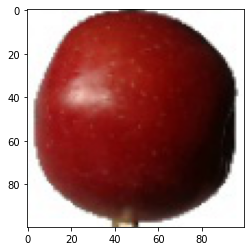

In [16]:
plt.imshow(apple_braeburn_img)

In [17]:
apple_braeburn_img.shape

(100, 100, 3)

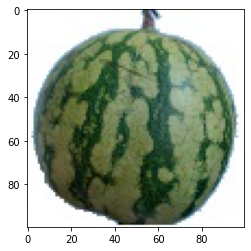

In [18]:
watermelon_path = train_path+'/Watermelon/'+os.listdir(train_path+'/Watermelon/')[0]
watermelon_img = imread(watermelon_path)
plt.imshow(watermelon_img)

In [19]:
len(os.listdir(train_path+'/Watermelon'))

475

In [20]:
watermelon_img.shape

(100, 100, 3)

In [21]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/Watermelon'):
    
    img = imread(test_path+'/Watermelon'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

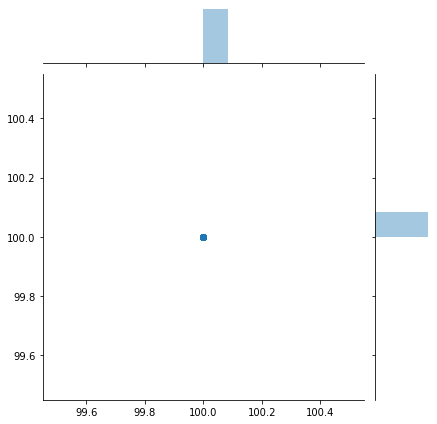

In [22]:
sns.jointplot(dim1,dim2)

In [23]:
image_shape = (100,100,3)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

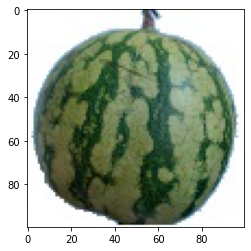

In [26]:
plt.imshow(watermelon_img)

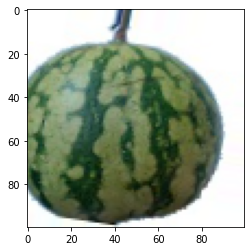

In [27]:
plt.imshow(image_gen.random_transform(watermelon_img))

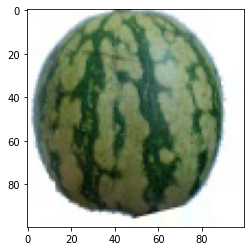

In [28]:
plt.imshow(image_gen.random_transform(watermelon_img))

In [29]:
image_gen.flow_from_directory(train_path)

Found 67692 images belonging to 131 classes.


In [30]:
image_gen.flow_from_directory(test_path)

Found 22688 images belonging to 131 classes.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(131, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=0)

In [36]:
batch_size = 16

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 67692 images belonging to 131 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 22688 images belonging to 131 classes.


In [39]:
train_image_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
4231/4231 [==============================] - 324s 77ms/step - loss: 1.7042 - accuracy: 0.5184 - val_loss: 0.6121 - val_accuracy: 0.8279
Epoch 2/20
4231/4231 [==============================] - 319s 75ms/step - loss: 0.6358 - accuracy: 0.8067 - val_loss: 0.4147 - val_accuracy: 0.8994
Epoch 3/20
4231/4231 [==============================] - 314s 74ms/step - loss: 0.6115 - accuracy: 0.8331 - val_loss: 0.3340 - val_accuracy: 0.9077
Epoch 4/20
4231/4231 [==============================] - 308s 73ms/step - loss: 0.6972 - accuracy: 0.8268 - val_loss: 0.5152 - val_accuracy: 0.9043


In [42]:
#Trained CNN model with 82.68% accuracy

In [43]:
model.save('fruits_classifier.h5')

In [44]:
results.history['accuracy']

[0.5183773636817932,
 0.8067127466201782,
 0.8331264853477478,
 0.8267889618873596]

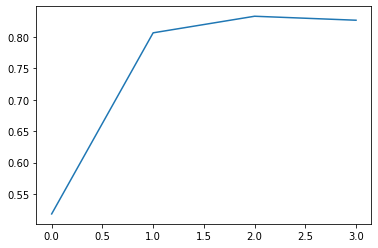

In [45]:
plt.plot(results.history['accuracy'])

In [46]:
model.save('fruits_classifier_epochs.h5')

In [47]:
train_image_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [48]:
losses = pd.DataFrame(model.history.history)

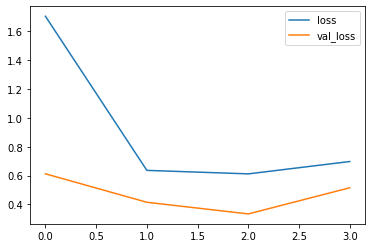

In [49]:
losses[['loss','val_loss']].plot()

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
model.evaluate(test_image_gen)

1418/1418 [==============================] - 75s 53ms/step - loss: 0.5125 - accuracy: 0.9049


[0.5124788284301758, 0.904883623123169]

In [52]:
from tensorflow.keras.preprocessing import image

In [53]:
#Testing the model 

In [54]:
img_path=train_path+'/Huckleberry/'+os.listdir(train_path+'/Huckleberry/')[10]

In [55]:
my_image = image.load_img(img_path,target_size=image_shape)

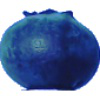

In [56]:
my_image

In [57]:
type(my_image)

PIL.JpegImagePlugin.JpegImageFile

In [58]:
my_image = image.img_to_array(my_image)

In [59]:
type(my_image)

numpy.ndarray

In [60]:
my_image.shape

(100, 100, 3)

In [61]:
my_image = np.expand_dims(my_image, axis=0)

In [62]:
my_image.shape

(1, 100, 100, 3)

In [63]:
model.predict(my_image)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [64]:
train_image_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [65]:
pred=model.predict(my_image)[0]
pred_int=list(pred.astype(int))
pred_int_index=pred_int.index(1)

In [66]:
dict=train_image_gen.class_indices

In [67]:
for i,j in zip(dict.keys(),dict.values()):
    if j==pred_int_index:
        break
print('We detected a picture of a '+i)       
        

We detected a picture of a Huckleberry


In [68]:
########END######